In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Boston housing dataset.csv")

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
data.shape

(506, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
data.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [8]:
data.CHAS.unique()

array([ 0., nan,  1.])

In [9]:
data.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,   nan,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,
        22. ,  20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [10]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
data.duplicated().sum()
np.int64(0)

0

In [12]:
df = data.copy()
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0],inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
df['AGE'].fillna(df['AGE'].median(),inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [15]:
df['CHAS'] = df['CHAS'].astype('int')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.611874,8.545770,0.00632,0.083235,0.29025,3.611874,88.9762
ZN,506.0,11.211934,22.921051,0.00000,0.000000,0.00000,11.211934,100.0000
INDUS,506.0,11.083992,6.699165,0.46000,5.190000,9.90000,18.100000,27.7400
CHAS,506.0,0.067194,0.250605,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.845850,27.486962,2.90000,45.925000,76.80000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


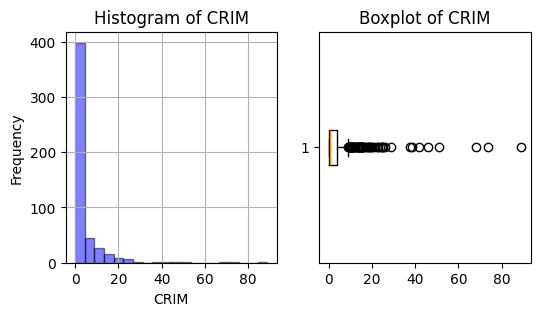

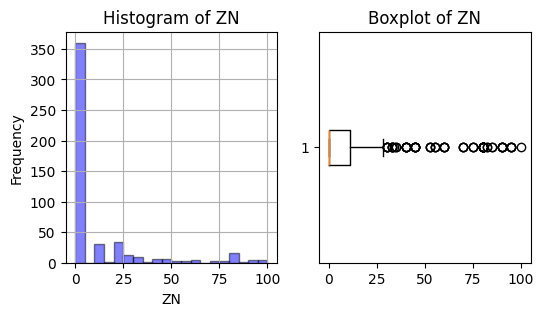

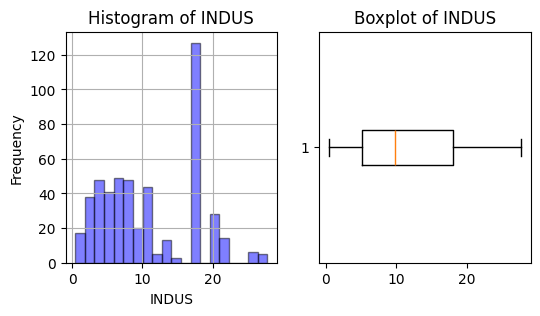

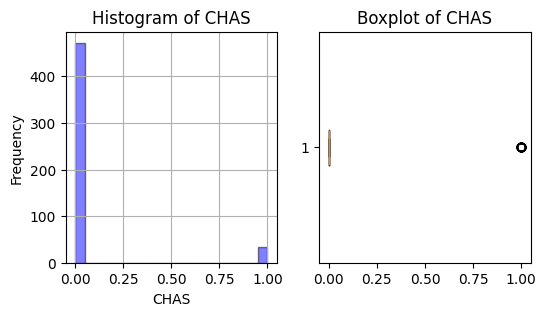

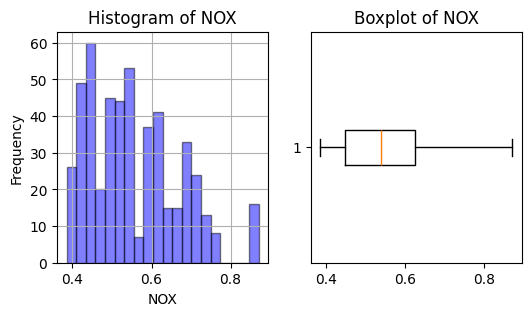

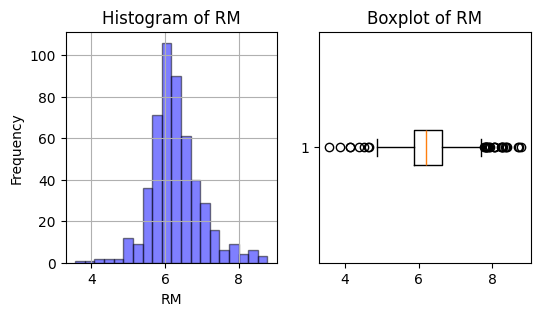

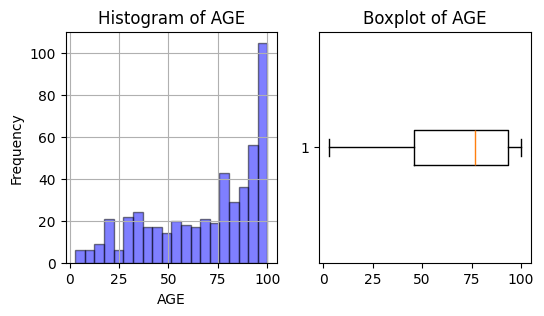

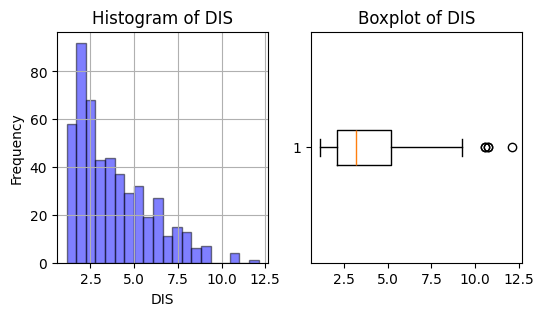

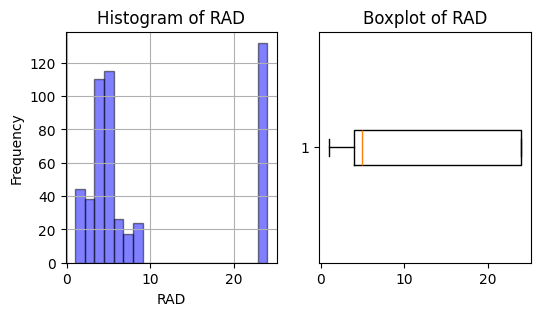

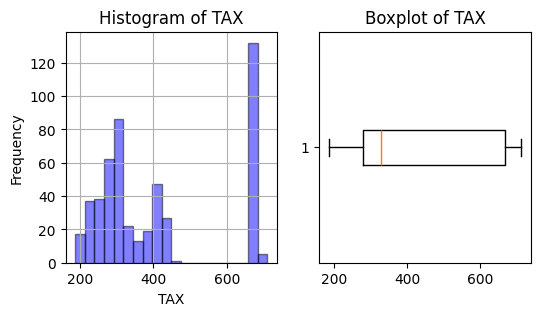

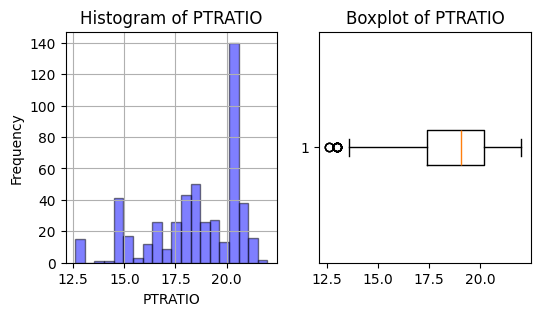

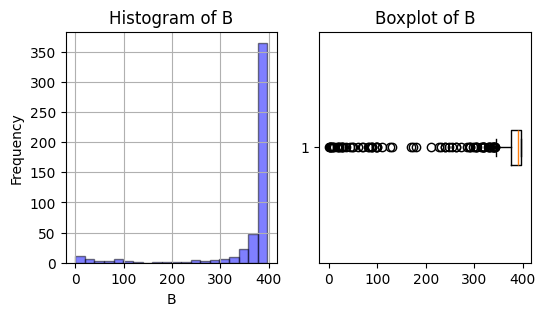

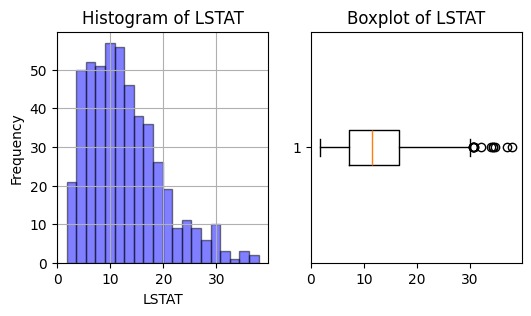

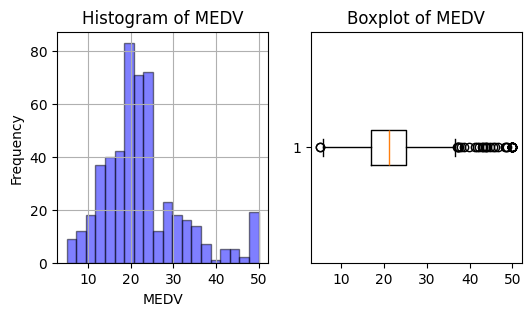

In [16]:
for i in df.columns:
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    df[i].hist(bins=20, alpha=0.5, color='b', edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.boxplot(df[i], vert = False)
    plt.title(f'Boxplot of {i}')
    plt.show()

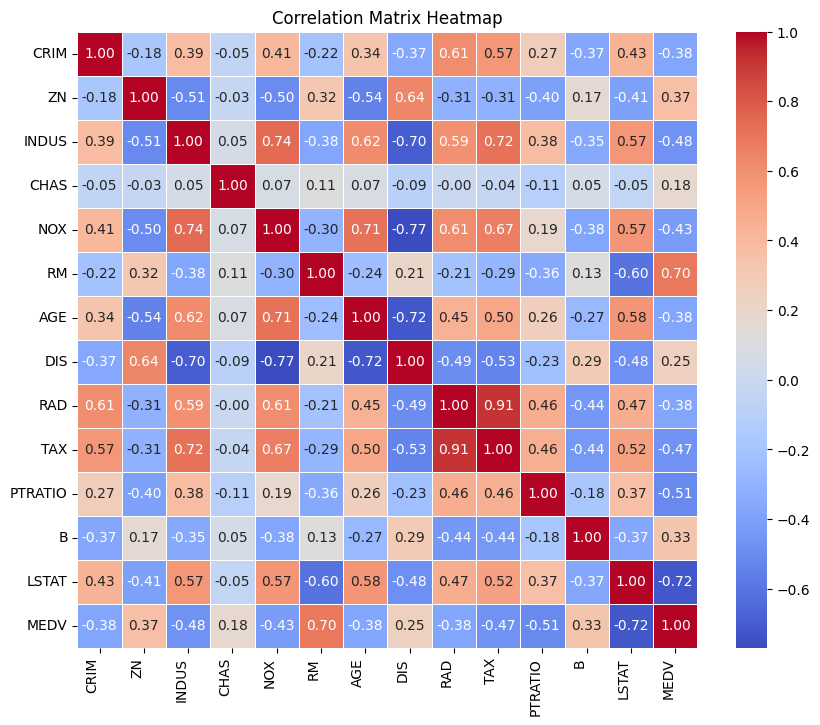

In [17]:
corr = df.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [18]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [19]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([28.99719439, 36.56606809, 14.51022803, 25.02572187, 18.42885474,
       23.02785726, 17.95437605, 14.5769479 , 22.14430832, 20.84584632,
       25.15283588, 18.55925182, -5.69168071, 21.71242445, 19.06845707,
       25.94275348, 19.70991322,  5.85916505, 40.9608103 , 17.21528576,
       25.36124981, 30.26007975, 11.78589412, 23.48106943, 17.35338161,
       15.13896898, 21.61919056, 14.51459386, 23.17246824, 19.40914754,
       22.56164985, 25.21208496, 25.88782605, 16.68297496, 16.44747174,
       16.65894826, 31.10314158, 20.25199803, 24.38567686, 23.09800032,
       14.47721796, 32.36053979, 43.01157914, 17.61473728, 27.60723089,
       16.43366912, 14.25719607, 26.0854729 , 19.75853278, 30.15142187,
       21.01932313, 33.72128781, 16.39180467, 26.36438908, 39.75793372,
       22.02419633, 18.39453126, 32.81854401, 25.370573  , 12.82224665,
       22.76128341, 30.73955199, 31.34386371, 16.27681305, 20.36945226,
       17.23156773, 20.15406451, 26.15613066, 30.92791361, 11.42

In [24]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'Mean squared error: {mse}')
print(f'Root mean squared error: {mse}')
print(f'R-squared: {r2}')

Mean squared error: 24.944071172175573
Root mean squared error: 24.944071172175573
R-squared: 0.6598556613717497
